In [1]:
import fastshap_wrapper as fw

In [2]:
from cifar10_experiment import CIFAR10AugmentationExperiment

In [3]:
import torchvision

In [4]:
transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

In [5]:
c = CIFAR10AugmentationExperiment(transform)
c.train(nepoch=1, batch_size=256, experiment_name='test')

Files already downloaded and verified
Files already downloaded and verified


Training loop:   0%|          | 0/195 [00:00<?, ?it/s]

----- Epoch = 1 -----
Val loss = 1.0510
Val acc = 0.6287

New best epoch, acc = 0.6287



In [6]:
c.val_hist

[0.6286999999999999]

In [7]:
# import torch
# torch.load('testcifar resnet.pt').to('cuda')

In [8]:
%%time
results = fw.fastshap_wrapper(c.model, c.train_set, c.test_set, surrogate_epochs=1, explainer_epochs=1, experiment_name='test3')

Training epoch:   0%|          | 0/196 [00:00<?, ?it/s]

----- Epoch = 1 -----
Val loss = 0.5594

New best epoch, loss = 0.5594



Training epoch:   0%|          | 0/390 [00:00<?, ?it/s]

----- Epoch = 1 -----
Val loss = 600.454041

New best epoch, loss = 600.454041

CPU times: user 1min 25s, sys: 6.13 s, total: 1min 31s
Wall time: 1min 52s


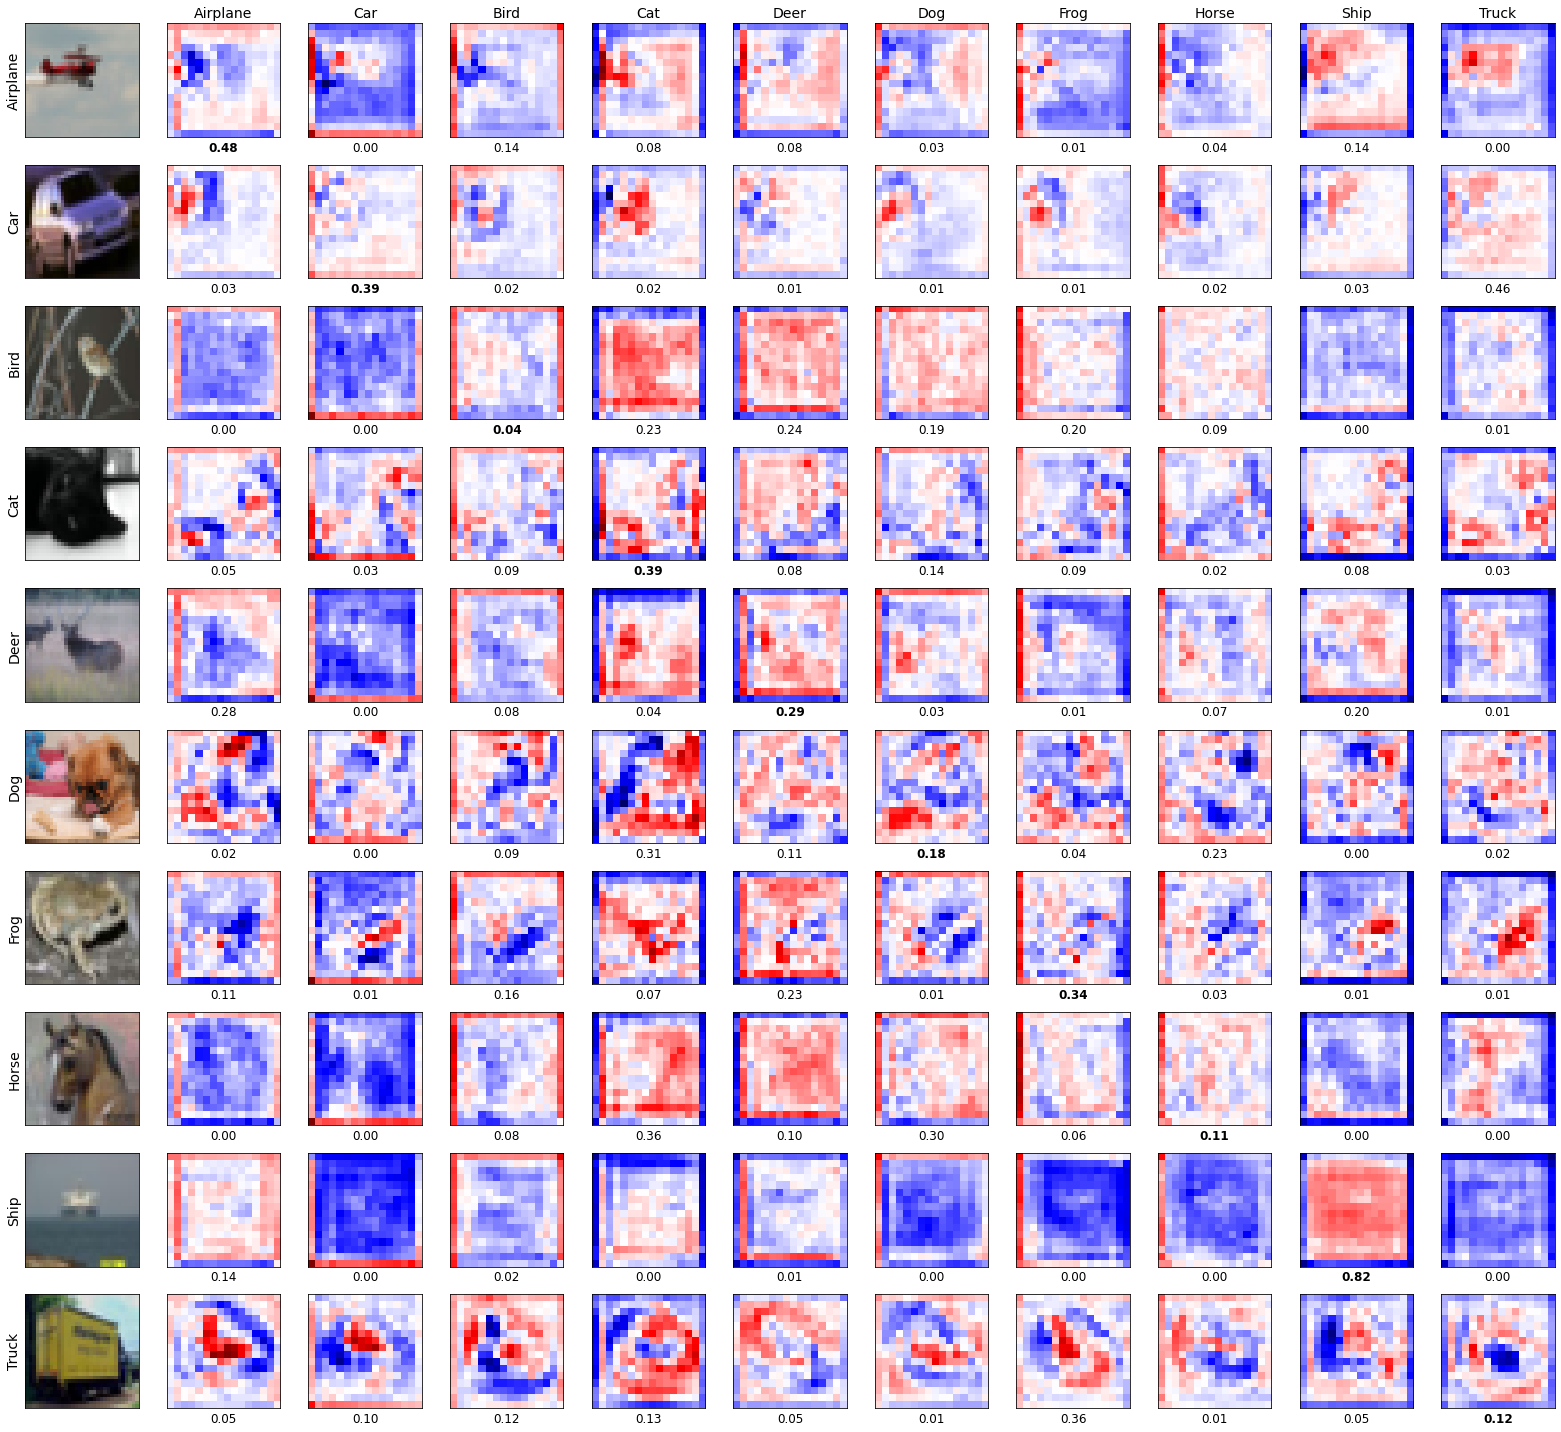

In [9]:
results.plot_results(c.test_set, return_raw=False, num_samples=2)

In [10]:
# results.fastshap.shap_values(DatasetInputOnly(c.test_set))

# DatasetInputOnly(c.test_set).data

# from fastshap.utils import MaskLayer2d, KLDivLoss, DatasetInputOnly

# [a for a in [range(2),range(3)]]

# import numpy as np
# import torch
# dset = c.test_set
# targets = np.array(dset.targets)
# num_classes = targets.max() + 1
# inds_lists = [np.where(targets == cat)[0] for cat in range(num_classes)]
# inds = np.concatenate([np.random.choice(cat_inds, size=10) for cat_inds in inds_lists])
# x, y = zip(*[dset[ind] for ind in inds])
# x = torch.stack(x)

# results.fastshap.shap_values(x).shape

# shapley_values = []
# for ind,a in enumerate(y):
#     shapley_values.append(results.fastshap.shap_values(x)[ind,a,:,:])
# shapley_values = np.stack(shapley_values)

# shapley_values.shape

# results.fastshap.shap_values(x)[ind,a,:,:].shape

# shapley_values[0].shape

# np.stack(shapley_values).shape

# results.fastshap.shap_values(x)[:,y,:,:].shape

# list(y)

# np.concatenate(inds)